In [1]:
from nltk.twitter import Query, credsfromfile
import numpy as np
import os
import sys
import pickle
sys.path.append("../bhtsa")
from twitter_senti_analyzer import senti_score_daily
# settings
oauth = credsfromfile()
client = Query(**oauth)
# start from Dec-06 21:30, take 10 tweets every 5 minute for an hour
twtNum = 100
startTime = [2016, 12, 1]
days = 10
path = os.path.join(os.getcwd()[:-4], 'data', 'model')
f = open(os.path.join(path, 'NBClassifier.pickle'), 'r')
NBC = pickle.load(f)
print NBC.informative_features()

Most Informative Features
            contains(ff) = True           positi : neg_tw =     31.7 : 1.0
           contains(bam) = True           positi : neg_tw =     29.7 : 1.0
           contains(sad) = True           neg_tw : positi =     24.8 : 1.0
     contains(community) = True           positi : neg_tw =     21.0 : 1.0
       contains(arrived) = True           positi : neg_tw =     18.7 : 1.0
          contains(glad) = True           positi : neg_tw =     17.0 : 1.0
     contains(goodnight) = True           positi : neg_tw =     16.3 : 1.0
           contains(ugh) = True           neg_tw : positi =     15.7 : 1.0
        contains(justin) = True           neg_tw : positi =     15.4 : 1.0
           contains(noo) = True           neg_tw : positi =     15.0 : 1.0
None


In [2]:
keyword1 = 'duke'
score_all1 = senti_score_daily(keyword1, client, NBC, twtNum, startTime, days, 1)
keyword2 = 'unc'
score_all2 = senti_score_daily(keyword2, client, NBC, twtNum, startTime, days, 1)

duke : 2016-12-01 to 2016-12-02 score=0.635644276436
duke : 2016-12-02 to 2016-12-03 score=0.650190047803
duke : 2016-12-03 to 2016-12-04 score=0.66014611788
duke : 2016-12-04 to 2016-12-05 score=0.658374231095
duke : 2016-12-05 to 2016-12-06 score=0.668769143742
duke : 2016-12-06 to 2016-12-07 score=0.68564867575
duke : 2016-12-07 to 2016-12-08 score=0.692424867776
duke : 2016-12-08 to 2016-12-09 score=0.70637912706
duke : 2016-12-09 to 2016-12-10 score=0.686146812679
duke : 2016-12-10 to 2016-12-11 score=0.674654595076
unc : 2016-12-01 to 2016-12-02 score=0.59450969639
unc : 2016-12-02 to 2016-12-03 score=0.600355479127
unc : 2016-12-03 to 2016-12-04 score=0.600355479127
unc : 2016-12-04 to 2016-12-05 score=0.72394610361
unc : 2016-12-05 to 2016-12-06 score=0.72394610361
unc : 2016-12-06 to 2016-12-07 score=0.72394610361
unc : 2016-12-07 to 2016-12-08 score=0.72394610361
unc : 2016-12-08 to 2016-12-09 score=0.72394610361
unc : 2016-12-09 to 2016-12-10 score=0.72394610361
unc : 2016-1

/Users/BohaoHuang/anaconda2/envs/bhplayground/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


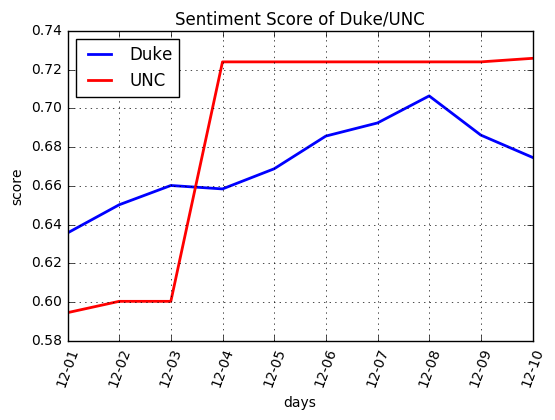

In [3]:
import datetime as dt
origin = dt.date(startTime[0], startTime[1], startTime[2])
dates = []
for i in range(days):
    next_val = origin + dt.timedelta(days=i)
    dates.append(next_val)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()
plt.xticks(rotation=70)
plt.plot(dates, np.mean(score_all1, axis=0), color='blue', linewidth=2, label='Duke')
plt.plot(dates, np.mean(score_all2, axis=0), color='red', linewidth=2, label='UNC')

ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
plt.xlabel('days')
plt.ylabel('score')
plt.title('Sentiment Score of Duke/UNC')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()